In [5]:
!pip install yfinance pandas matplotlib numpy streamlit
!pip install pandas_datareader


import numpy as np 
import pandas as pd 
import yfinance as yf
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline


In [6]:
assets = ['PG','^GSPC']
pf_data = pd.DataFrame()

pf_data = yf.download(assets, start="2018-01-01", auto_adjust=True)
adj_close = pf_data['Close']   # adjusted prices
print(adj_close.head())


[*********************100%***********************]  2 of 2 completed

Ticker             PG        ^GSPC
Date                              
2018-01-02  73.854919  2695.810059
2018-01-03  73.765320  2713.060059
2018-01-04  74.286751  2723.989990
2018-01-05  74.335625  2743.149902
2018-01-08  74.726685  2747.709961


In [7]:
pf_data.tail()

Price            Close                     High                      Low  \
Ticker              PG        ^GSPC          PG        ^GSPC          PG   
Date                                                                       
2025-08-27  156.960007  6481.399902  157.130005  6487.060059  155.789993   
2025-08-28  155.649994  6501.859863  157.009995  6508.229980  155.029999   
2025-08-29  157.039993  6460.259766  157.559998  6491.759766  155.649994   
2025-09-02  157.990005  6415.540039  158.860001  6416.540039  156.979996   
2025-09-03  156.600006  6452.120117  158.634995  6453.600098  156.494995   

Price                          Open                Volume              
Ticker            ^GSPC          PG        ^GSPC       PG       ^GSPC  
Date                                                                   
2025-08-27  6457.839844  156.149994  6462.259766  4551200  4143680000  
2025-08-28  6466.959961  157.000000  6483.839844  5857400  4283760000  
2025-08-29  6444.569824  156.089996  6489.279785  5318200  4234840000  
2025-09-02  6360.580078  157.360001  6401.509766  6425200  4784000000  
2025-09-03  6428.100098  157.649994  6445.819824  1221230   739016962

[*********************100%***********************]  2 of 2 completed


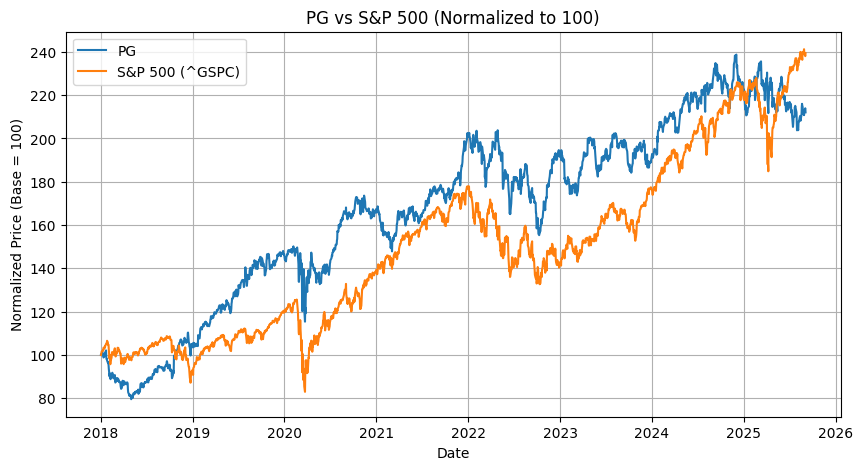

In [8]:
assets = ['PG', '^GSPC']

# Download data with adjusted prices
pf_data = yf.download(assets, start="2018-01-01", auto_adjust=True)['Close']
normalized = pf_data / pf_data.iloc[0] * 100

# Plot
plt.figure(figsize=(10, 5))
plt.plot(normalized.index, normalized['PG'], label='PG')
plt.plot(normalized.index, normalized['^GSPC'], label='S&P 500 (^GSPC)')
plt.title('PG vs S&P 500 (Normalized to 100)')
plt.xlabel('Date')
plt.ylabel('Normalized Price (Base = 100)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
 log_returns.mean()*250

Ticker
PG       0.097508
^GSPC    0.113223
dtype: float64

In [11]:
log_returns.cov() * 250

Ticker,PG,^GSPC
Ticker,,
PG,0.040101,0.019773
^GSPC,0.019773,0.039415


In [12]:
log_returns.corr()

Ticker,PG,^GSPC
Ticker,,
PG,1.000000,0.497356
^GSPC,0.497356,1.000000


In [13]:
num_assets = len(assets)
num_assets

2

In [14]:
arr = np.random.random(2)
arr

array([0.97376824, 0.04499183])

In [15]:
arr[0] + arr[1]

np.float64(1.0187600686213543)

In [16]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.26840015, 0.73159985])

In [17]:
weights[0] + weights[1]

np.float64(1.0)

In [18]:
#expected portfolio return 
np.sum(weights * log_returns.mean())*250 


np.float64(0.10900477831000367)

In [19]:
#epvariance
np.dot(weights.T, np.dot(log_returns.cov()*250,weights))

np.float64(0.03175044373721205)

In [20]:
#epvolatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250,weights)))

np.float64(0.17818654196434716)

In [21]:
pfolio_returns = []
pfolio_volatilities = []
for x in range (1000):
    weights = np.random.random(num_assets)
    weights / np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean())* 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()* 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns,pfolio_volatilities

(array([0.05591762, 0.09972657, 0.13310205, 0.11397153, 0.11981973,
        0.05473523, 0.0633286 , 0.11223741, 0.0220833 , 0.03730752,
        0.08153253, 0.04346275, 0.07502952, 0.10877558, 0.13474556,
        0.09278861, 0.14077754, 0.13755851, 0.12616719, 0.07909998,
        0.09640399, 0.06083203, 0.14375575, 0.16092476, 0.16690681,
        0.08299299, 0.01770121, 0.10840835, 0.16028202, 0.11688318,
        0.07550042, 0.05728183, 0.06656813, 0.11442527, 0.08194579,
        0.17902853, 0.11491207, 0.09365298, 0.14776866, 0.08336059,
        0.14419454, 0.06383299, 0.1194385 , 0.06869487, 0.19106621,
        0.16366207, 0.15704736, 0.12832929, 0.13810824, 0.07592092,
        0.12686591, 0.05853125, 0.12900587, 0.08611099, 0.16265397,
        0.09783717, 0.14078157, 0.06445448, 0.11567168, 0.02255469,
        0.11928373, 0.03921842, 0.09739586, 0.10873936, 0.19401852,
        0.05929236, 0.10686822, 0.15493306, 0.12751228, 0.1674852 ,
        0.11611633, 0.09439246, 0.09692508, 0.02

In [22]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})


In [23]:
portfolios.head()

,Return,Volatility
0,0.055918,0.094705
1,0.099727,0.166687
2,0.133102,0.215917
3,0.113972,0.184853
4,0.119820,0.197851


In [24]:
portfolios.tail()

,Return,Volatility
995,0.113449,0.201196
996,0.005228,0.009612
997,0.142113,0.245897
998,0.129695,0.216063
999,0.128331,0.209730


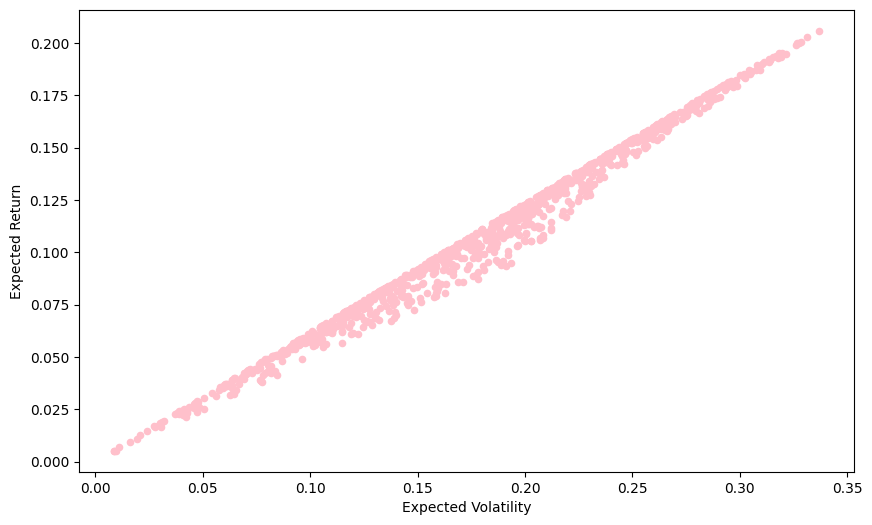

In [25]:

portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10, 6),color = 'pink');
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()

In [26]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


2025-09-03 20:30:24.859 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 20:30:25.064 
  command:

    streamlit run C:\Users\Acer\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-09-03 20:30:25.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 20:30:25.065 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
[*********************100%***********************]  2 of 2 completed
2025-09-03 20:30:26.123 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 20:30:26.124 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-03 20:30:26.124 Thread 'MainThread': missing ScriptRunContext! This warning ca

DeltaGenerator()

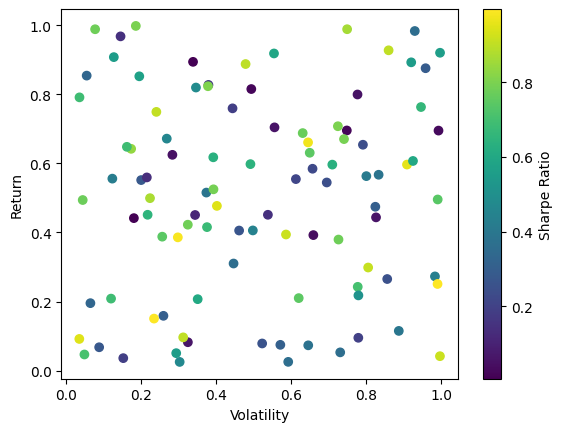

In [27]:
import streamlit as st
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf

st.title("📊 Markowitz Portfolio Optimization Dashboard")

# Assets
assets = ["PG", "^GSPC"]

# Download data (option A: adjusted prices via Close)
pf_data = yf.download(assets, start="2018-01-01", auto_adjust=True)
adj_close = pf_data["Close"]

# Normalize (rebased to 100)
normalized = adj_close / adj_close.iloc[0] * 100

st.subheader("📈 Normalized Price Performance")
st.line_chart(normalized)

# ---- Efficient Frontier Example ----
# Dummy portfolios for illustration (replace with real ones later)
portfolios = pd.DataFrame({
    "Volatility": np.random.rand(100),
    "Return": np.random.rand(100),
    "Sharpe": np.random.rand(100)
})

st.subheader("⚡ Efficient Frontier")
fig, ax = plt.subplots()
scatter = ax.scatter(
    portfolios['Volatility'], portfolios['Return'],
    c=portfolios['Sharpe'], cmap='viridis'
)
ax.set_xlabel("Volatility")
ax.set_ylabel("Return")
fig.colorbar(scatter, label="Sharpe Ratio")
st.pyplot(fig)
